In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
cleaned_data = pd.read_csv("../src/cleaned_data.csv")
cleaned_data['TotalArea'] = cleaned_data.apply(lambda row: row.LivingArea + row.GardenArea + row.TerraceArea, axis = 1)
cleaned_data['PricePerSquareMeter'] = cleaned_data.apply(lambda row: row.Price / row.TotalArea, axis = 1)
cleaned_data.info()


ModuleNotFoundError: No module named 'matplotlib'

In [4]:
model_data = pd.read_csv("../src/model_data.csv")
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44592 entries, 0 to 44591
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       44592 non-null  int64  
 1   City                     44592 non-null  object 
 2   PostalCode               44592 non-null  int64  
 3   Region                   44592 non-null  object 
 4   District                 44592 non-null  object 
 5   Province                 44592 non-null  object 
 6   PropertyType             44592 non-null  object 
 7   PropertySubType          44592 non-null  object 
 8   Price                    44591 non-null  float64
 9   ConstructionYear         29851 non-null  float64
 10  BedroomCount             44592 non-null  int64  
 11  LivingArea               44592 non-null  float64
 12  KitchenType              27717 non-null  object 
 13  Furnished                44592 non-null  int64  
 14  Fireplace             

In [37]:
house_data = cleaned_data[cleaned_data['PropertyType'] == 'House']
apartment_data = cleaned_data[cleaned_data['PropertyType'] == 'Apartment']




array([  368.,    nan,   407., ..., 54410.,  1266.,  1147.])

In [ ]:
import seaborn as sns

# Define function to filter outliers based on IQR
def filter_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Filter outliers for house_data and apartment_data
filtered_house_data = pd.DataFrame(filter_outliers(house_data['PricePerSquareMeter']))
filtered_apartment_data = pd.DataFrame(filter_outliers(apartment_data['PricePerSquareMeter']))

# Plot histograms with filtered data
sns.histplot(data=filtered_house_data, kde=True, color='blue', palette=['blue'])
sns.histplot(data=filtered_apartment_data, kde=True, color='orange', palette=['orange'])

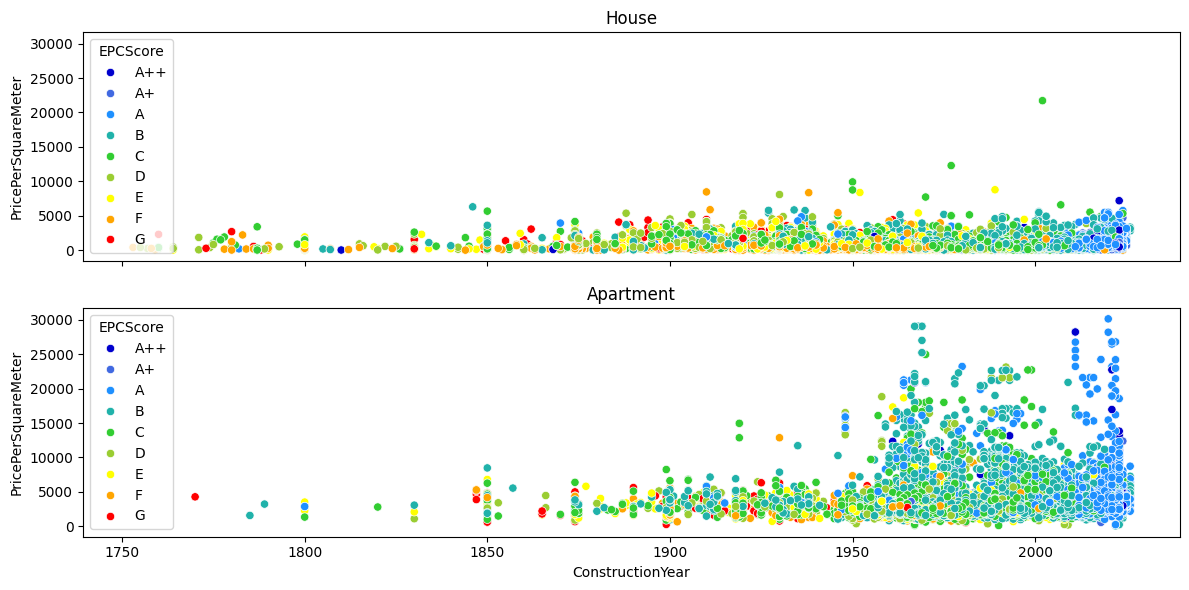

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette
custom_palette = {
    'G': 'red',     # G: red
    'F': 'orange',  # F: orange
    'E': 'yellow',  # E: yellow
    'D': 'yellowgreen',  # D: yellow-green
    'C': 'limegreen',    # C: green
    'B': 'lightseagreen',  # B: light blue-green
    'A': 'dodgerblue',  # A: blue
    'A+': 'royalblue',  # A+: dark blue
    'A++': 'mediumblue', # A++: medium blue
}

# Define custom order for EPCScore legend
epc_score_order = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G']

# Create a figure with two subplots side by side
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True, sharey=True)

# Scatter plot for PropertyType == House
sns.scatterplot(x="ConstructionYear", y="PricePerSquareMeter", hue='EPCScore', hue_order=epc_score_order, palette=custom_palette, data=house_data, ax=axs[0])
axs[0].set_title('House')

# Scatter plot for PropertyType == Apartment
sns.scatterplot(x="ConstructionYear", y="PricePerSquareMeter", hue='EPCScore', hue_order=epc_score_order, palette=custom_palette, data=apartment_data, ax=axs[1])
axs[1].set_title('Apartment')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate filtered_house_df and filtered_apartment_df
concatenated_df = pd.concat([filtered_house_df.assign(PropertyType='House'), filtered_apartment_df.assign(PropertyType='Apartment')])

# Create a figure and axes for the plot
plt.figure(figsize=(12, 8))

# Plot boxplot for concatenated data
sns.boxplot(x="Province", y="PricePerSquareMeter", hue='PropertyType', data=concatenated_df, showfliers=False, palette="pastel")

# Set y-axis label
plt.ylabel("Price (€/sqm)")

# Set x-axis label
plt.xlabel("Province")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


NameError: name 'filtered_house_df' is not defined

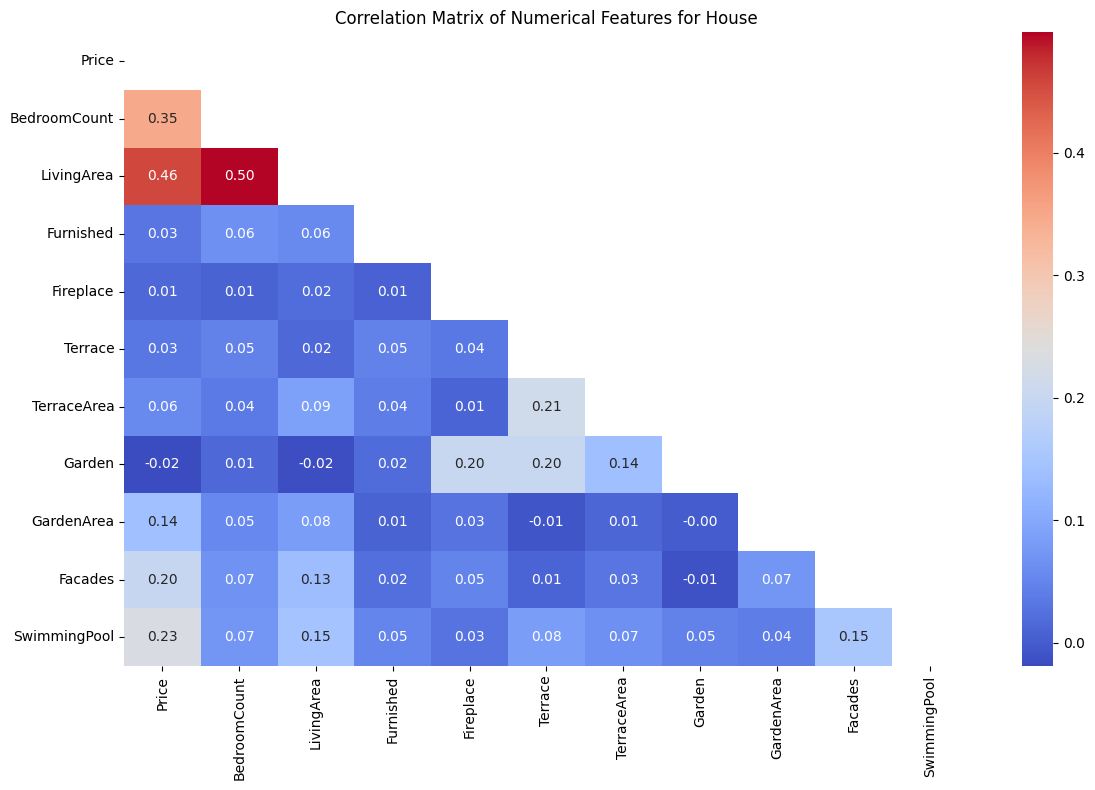

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Remove the 'Unnamed: 0' column if present
cleaned_data = cleaned_data.loc[:, ~cleaned_data.columns.str.contains('^Unnamed')]

# Filter the DataFrame to include only PropertyType == 'House' and exclude specific columns
columns_to_exclude = ['ID', 'PostalCode', 'ConstructionYear', 'Latitude', 'Longitude', 'TotalArea', 'PricePerSquareMeter']
house_data = cleaned_data[cleaned_data['PropertyType'] == 'House'].select_dtypes(include=['int64', 'float64']).drop(columns=columns_to_exclude, errors='ignore')

# Compute the correlation matrix
correlation_matrix = house_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and adjust layout
plt.title('Correlation Matrix of Numerical Features for House')
plt.tight_layout()

# Show the plot
plt.show()



c:\Users\bearr\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\bearr\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


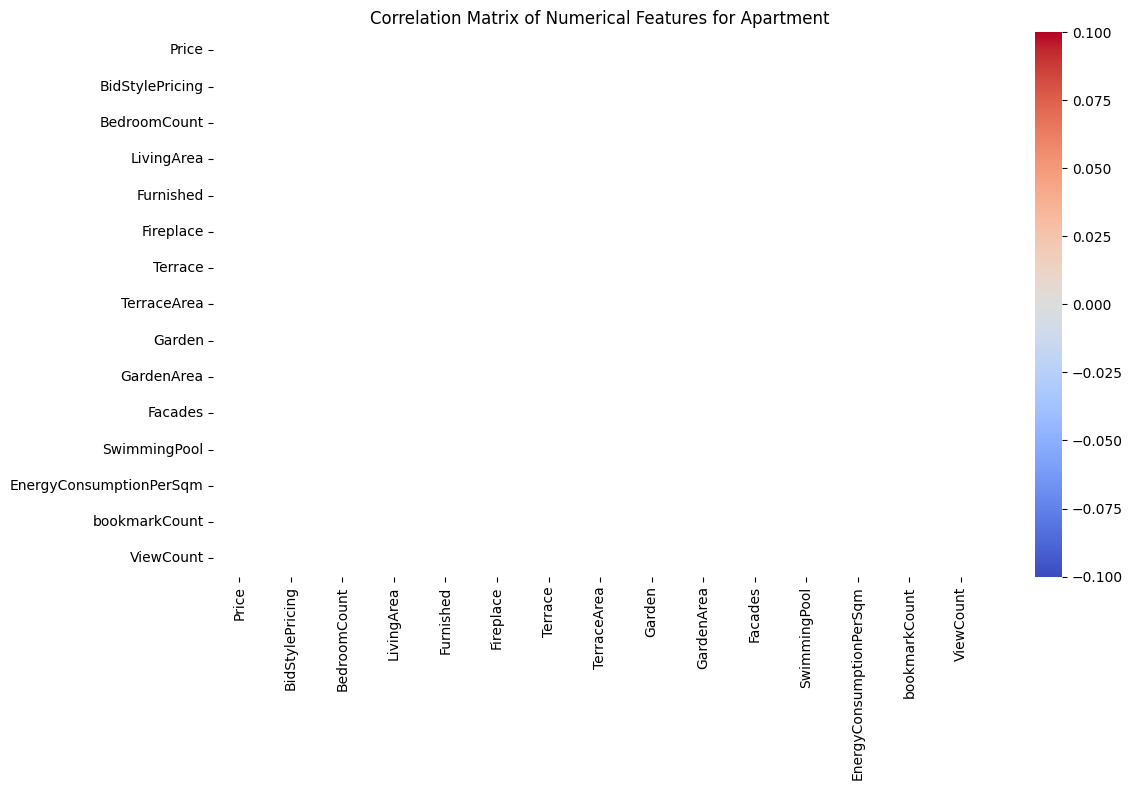

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Remove the 'Unnamed: 0' column if present
cleaned_data = cleaned_data.loc[:, ~cleaned_data.columns.str.contains('^Unnamed')]

# Filter the DataFrame to include only PropertyType == 'House' and exclude specific columns
columns_to_exclude = ['ID', 'PostalCode', 'ConstructionYear', 'Latitude', 'Longitude', 'TotalArea', 'PricePerSquareMeter']
house_data = cleaned_data[cleaned_data['PropertyType'] == 'Apartment'].select_dtypes(include=['int64', 'float64']).drop(columns=columns_to_exclude, errors='ignore')

# Compute the correlation matrix
correlation_matrix = house_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and adjust layout
plt.title('Correlation Matrix of Numerical Features for Apartment')
plt.tight_layout()

# Show the plot
plt.show()
